# Objetivo comercial de este cuaderno

Este cuaderno tiene como **objetivo desarrollar un modelo predictivo del riesgo de impago de tarjetas de crédito** (nuestra variable objetivo). Mediante el análisis de datos históricos de los clientes, incluidos los datos demográficos, el historial crediticio y el comportamiento de pago, el modelo busca identificar a las personas que probablemente no paguen sus tarjetas de crédito en el futuro.

**Valor comercial:**

* **Pérdidas financieras reducidas:** Al identificar de manera proactiva a los clientes de alto riesgo, las instituciones financieras pueden implementar estrategias para mitigar las posibles pérdidas asociadas con los impagos, como ajustar los límites de crédito, ofrecer planes de pago personalizados o intensificar los esfuerzos de cobranza.
* **Gestión mejorada del riesgo crediticio:** El modelo proporciona un enfoque basado en datos para evaluar y gestionar el riesgo crediticio, lo que permite a las instituciones financieras tomar decisiones crediticias más informadas y optimizar su cartera crediticia.
* **Segmentación mejorada de clientes:** Los conocimientos obtenidos a partir de este análisis se pueden utilizar para segmentar a los clientes en función de sus perfiles de riesgo, lo que facilita campañas de marketing específicas, ofertas de productos personalizados y una mejor gestión de las relaciones con los clientes.
**Mayor eficiencia operativa:** La automatización del proceso de evaluación del riesgo crediticio mediante el modelo puede ahorrar tiempo y recursos a las instituciones financieras, agilizando las operaciones y aumentando la eficiencia.

**En general, este modelo respalda la toma de decisiones financieras acertadas, mejora la gestión de riesgos y mejora las estrategias de relación con los clientes, lo que contribuye a la rentabilidad y la estabilidad a largo plazo de las instituciones financieras.**

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Cargando Datos para nuestros graficos

Usaremos información sobre publicación de trabajos en las bolsas de internet

In [2]:
df = pd.read_csv('data/df1.csv') # generamos un objeto dataframe `df` usando pandas y el archivo csv
nRow, nCol = df.shape # asignamos a 2 objectos `nRow` y `nCol` los resultados de df.shape para conocer el tamaño de dataframe
print(f'Se tienen {nRow} renglones y {nCol} columnas') #imprimimos los resultados usando función, agregando con {} los valores de obtuvimos de df.shape()

Se tienen 30000 renglones y 25 columnas


Copiamos este dataframe `df` en otro dataframe que llamaremos `impagos` que se utilizará para los cálculos posteriores.

Primero, vamos a revisar de los datos para verificar si se han copiado correctamente.

In [3]:
impagos = df.copy()
print(impagos.shape)
impagos.head()

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Podemos ver que nuestra información si contiene la variable objetivo en el artibuto `default.payment.next.month`; asi como otros atributos que potencialmente nos ayudarian a predecir si una persona dejará de pagar el mes que viene o no con los historicos proporcionados por nuestra misma organización en nuestro contexto operativo.

In [4]:
impagos.describe().T #usamos este metodo pandas para transponer los resultados de impagos.describe()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


Podemos ver que las 25 columnas tienen un conteo de 30000, lo que indica que no falta ningún valor.
Podemos ver que el estado de pago se indica en las columnas PAY_0, PAY_2... sin la columna PAY_1, por lo que cambiamos el nombre de PAY_0 a PAY_1 para facilitar la comprensión.

In [5]:
impagos.rename(columns={'default.payment.next.month':'def_pay'}, inplace=True) #renombrando columna
impagos.rename(columns={'PAY_0':'PAY_1'}, inplace=True) #renombrando columna

A continuación, verificamos el tipo de datos de cada variable del dataframe. Vemos que todas las columnas son de tipo int64, mientras que por conocimientos previos sabemos que SEX, EDUCATION, MARRIAGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, default_payment_next_month son atributos categoricos. Por lo tanto, convertimos estos atributos en categóricos.

In [6]:
# validando los tipos de datos en nuestros atributos
impagos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [7]:
impagos.isna().sum()    # solo para asegurar revisamos los datos nulos en cada atributo

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
def_pay      0
dtype: int64

No falta ningún valor, por lo tanto no hay necesidad de imputación (reemplazo / borrado) de valores para asgurar que se cumplen las condiciones de un dataframe para machine learning. Ahora pasamos directamente a la visualización del conjunto de datos de morosos.

Antes de pasar a la visualización:

1. Primero seleccionamos algunos atributos que creemos que estarían más correlacionadas con la variable objetivo.

2. A partir de los datos proporcionados, vemos que queremos predecir si una persona dejará de pagar el mes que viene o no.

3. Esta predicción depende principalmente del historial de pago anterior, cuál es el saldo límite, la edad, la educación y el matrimonio.


Grafiquémoslos primero la distribución de la variable objetivo para conocer su comportamiento.

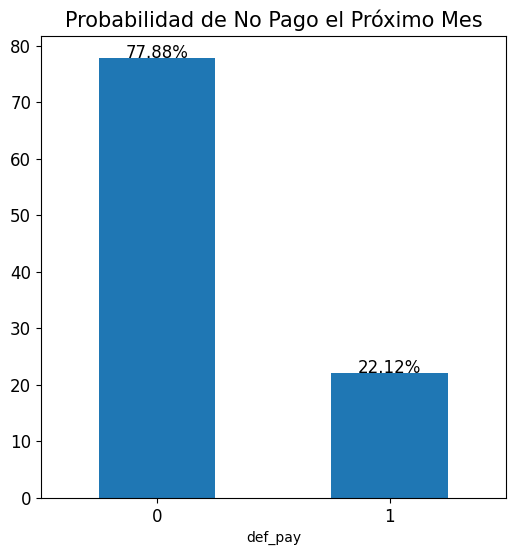

In [10]:
# al ser la variable objetivo una variable boleana ( 1 o 0 ),
# podemos usar una grafica de barras
imp_cnt = (impagos.def_pay.value_counts(normalize=True)*100)
imp_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probabilidad de No Pago el Próximo Mes", fontsize=15)
for x, y in zip(imp_cnt.index, imp_cnt.values):
    plt.text(x, y, f'{y:.2f}%', ha='center', fontsize=12)

Podemos ver que el conjunto de datos consta de un 77% de clientes que no se espera que incumplan con el pago, mientras que se espera que un 23% de clientes incumplan con el pago.


Siguiente ya que estamos revisando la variable objetivo "Impago proximo mes", ahora comparemos bajo esta misma linea como se comporta de acuerdo con su comportamiento historico de pago.

Text(0.5, 0.98, 'Situación de Pago de los ultimos 6 meses en proporción a los Impago Siguiente Mes')

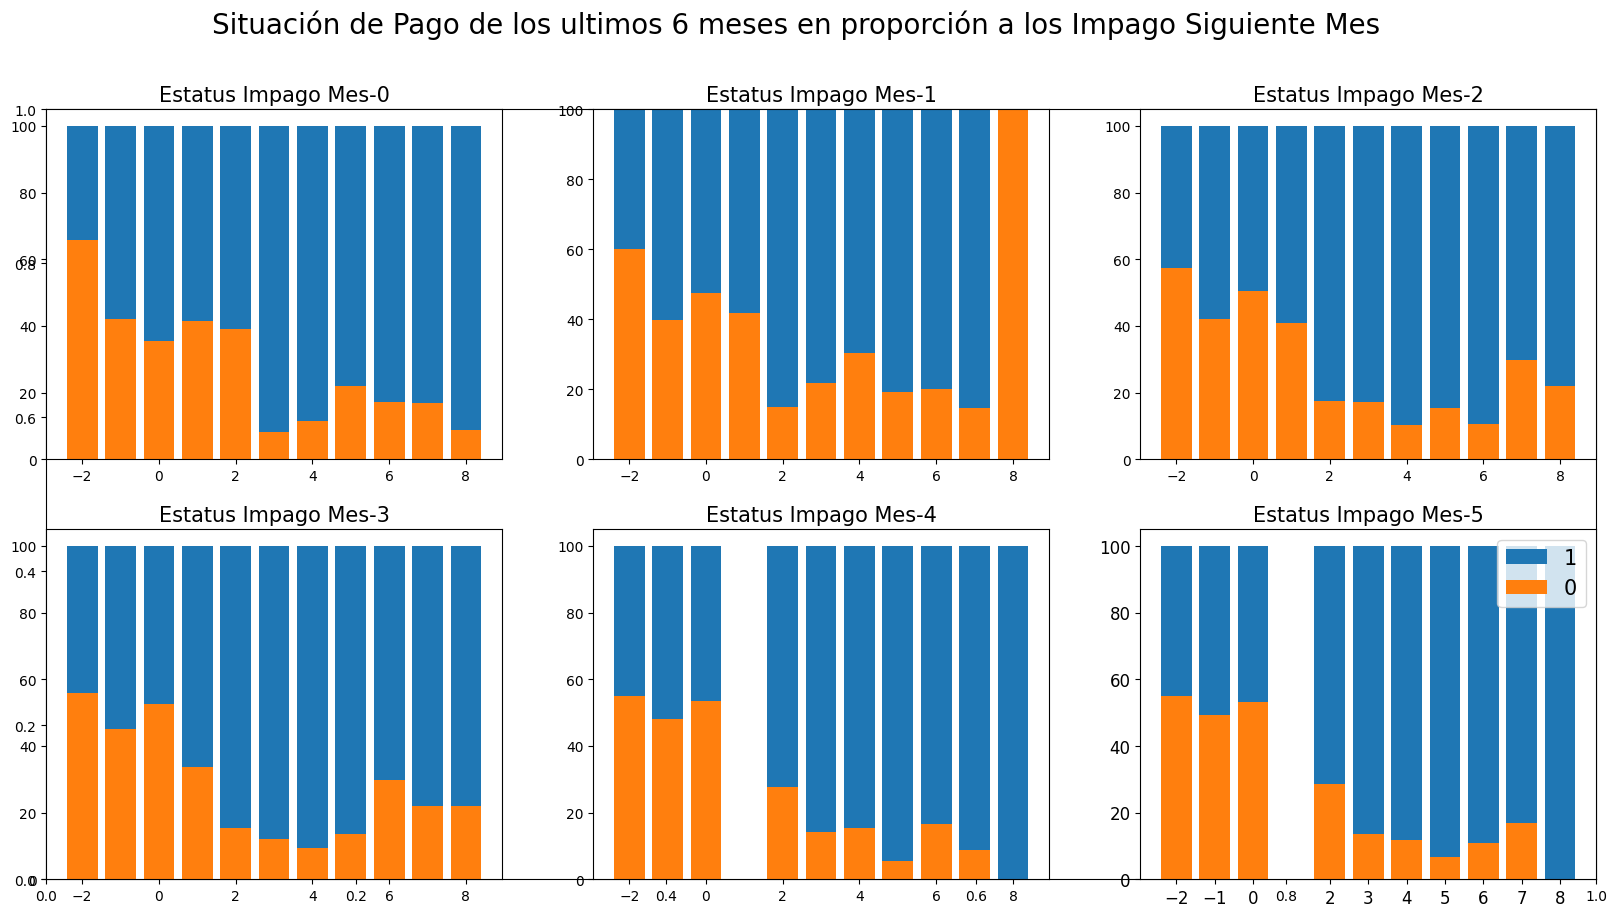

In [11]:
plt.subplots(figsize=(20,10))

ind = sorted(impagos.PAY_1.unique())
pay_0 = (impagos.PAY_1[impagos['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (impagos.PAY_1[impagos['def_pay'] == 1].value_counts(normalize=True))
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(231)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Estatus Impago Mes-0", fontsize=15)

ind = sorted(impagos.PAY_2.unique())
pay_0 = (impagos.PAY_2[impagos['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (impagos.PAY_2[impagos['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(232)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Estatus Impago Mes-1", fontsize=15)

ind = sorted(impagos.PAY_3.unique())
pay_0 = (impagos.PAY_3[impagos['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (impagos.PAY_3[impagos['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(233)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Estatus Impago Mes-2", fontsize=15)

ind = sorted(impagos.PAY_4.unique())
pay_0 = (impagos.PAY_4[impagos['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (impagos.PAY_4[impagos['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(234)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Estatus Impago Mes-3", fontsize=15)

ind = sorted(impagos.PAY_5.unique())
pay_0 = (impagos.PAY_5[impagos['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (impagos.PAY_5[impagos['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(235)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Estatus Impago Mes-4", fontsize=15)

ind = sorted(impagos.PAY_6.unique())
pay_0 = (impagos.PAY_6[impagos['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (impagos.PAY_6[impagos['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(236)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Estatus Impago Mes-5", fontsize=15)

plt.xticks(ind, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="upper right", fontsize=15)
plt.suptitle("Situación de Pago de los ultimos 6 meses en proporción a los Impago Siguiente Mes", fontsize=20)

El gráfico anterior nos muestra la proporción de clientes que no pagarán el mes siguiente según su historial de pagos.

**En la situación actual de la cartera, cuanto antes se realice el pago, menores serán las probabilidades de que esos clientes no paguen.**

Ya que hemos revisado la información de pagos/impagos revisemos los otros atributos como el saldo límite y la edad.

<Axes: xlabel='AGE', ylabel='Density'>

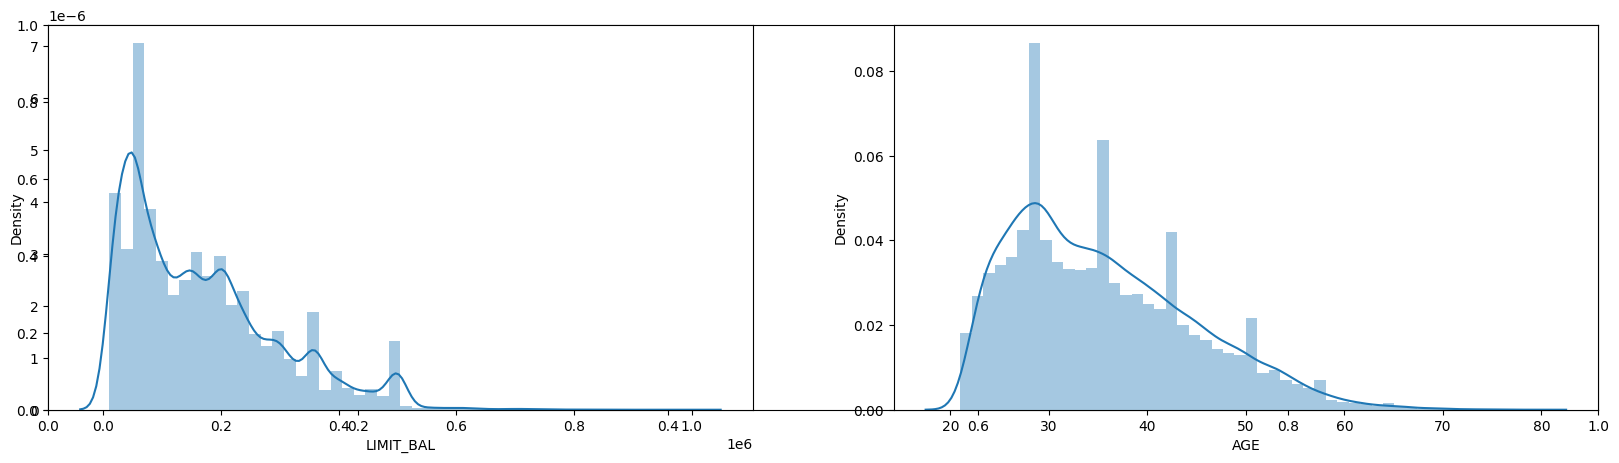

In [12]:
# usamos seaborn para graficar la distribución de los atributos de Balance y Edad
# usamos subplots de matplotlib para poner las graficas una a lado de otra para comparar
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(impagos.LIMIT_BAL)

plt.subplot(122)
sns.distplot(impagos.AGE)

Al representar gráficamente distribución de estas
variable,  observamos que :
1. el dataframe consta de datos sesgados sobre el saldo límite y la edad de los clientes.
2. Tenemos una mayor cantidad de clientes con un saldo límite entre 0 y $200,000.
3. Tenemos una mayor cantidad de clientes en el grupo de edad de 20 a 40 años, es decir, clientes de grupos de edad mayoritariamente jóvenes y de mediana edad.

Observaremos el efecto de las variables en la variable objetivo a continuación

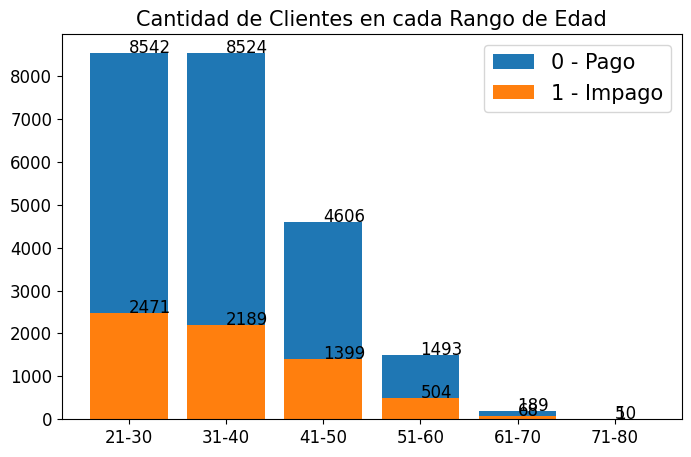

In [13]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
impagos['AGE_BIN'] = pd.cut(x=impagos.AGE, bins=bins, labels=names, right=True)

age_cnt = impagos.AGE_BIN.value_counts()
age_0 = (impagos.AGE_BIN[impagos['def_pay'] == 0].value_counts())
age_1 = (impagos.AGE_BIN[impagos['def_pay'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=impagos, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(age_0.index, age_0.values, label='0 - Pago')
plt.bar(age_1.index, age_1.values, label='1 - Impago')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Cantidad de Clientes en cada Rango de Edad", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()


Tenemos un máximo de clientes en el grupo de edad de 21 a 30 años, seguido del de 31 a 40 años. Por lo tanto, a medida que aumenta el grupo de edad, disminuye la cantidad de clientes que no pagarán el mes siguiente. Por lo tanto, podemos ver que la edad es una característica importante para predecir el pago por defecto del mes siguiente.

Del gráfico anterior podemos inferir:
* que las personas casadas de entre 30 y 50 años y los clientes solteros de entre 20 y 30 años tienden a incumplir el pago, siendo los clientes solteros más propensos a incumplir el pago.

Vamos a seguir exporando la variable objetivo con cada atributo por separado. Seguimos con el atributo MATRIMONIO de los clientes para encontrar la probabilidad de incumplir el pago el mes siguiente.

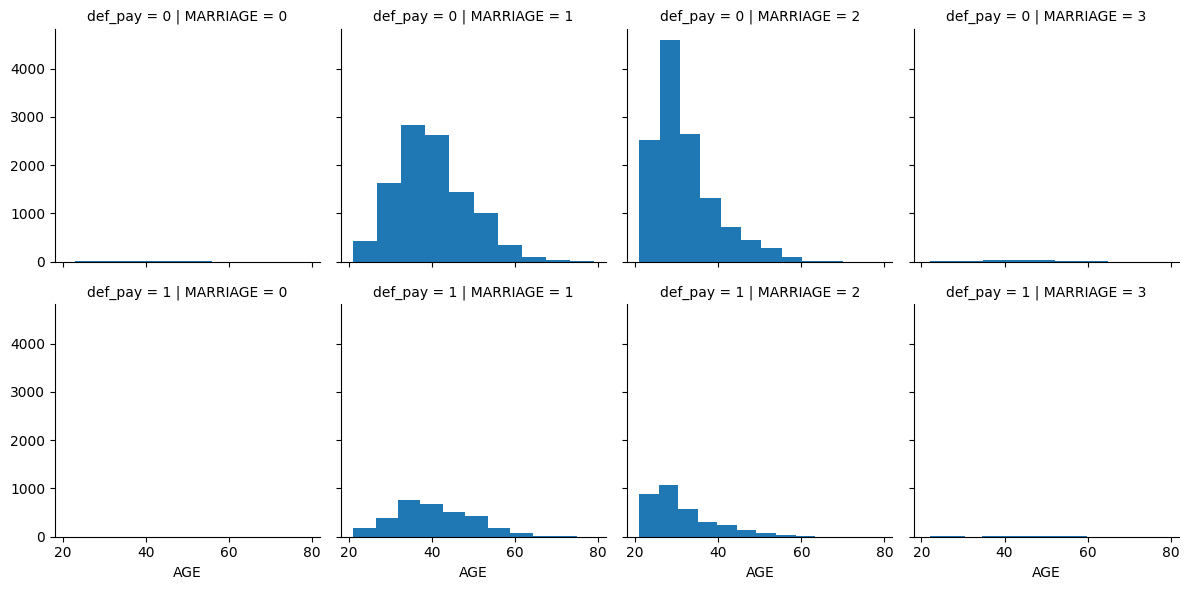

In [14]:
g = sns.FacetGrid(impagos, row='def_pay', col='MARRIAGE') #con este metodo determinamos graficas para todas las combinaciones de la variable en row y en la variable col
g = g.map(plt.hist, 'AGE') #con este metodo usamos para determinar que mostrar en cada una de las graficas determinadas anteriormente.

# de esta forma graficamos el impacto de impago y estatus matrimonial, sobre la edad de la persona.

Se puede observar que en nuestro contexto operativo los casados dantes de los 40 años tienen una tendencia muy alta a no pagar en comparación con los no casados de todos los grupos de edad.

Por lo tanto, podemos la columna MATRIMONIO de los clientes si es determinante para predecir la probabilidad de impago.

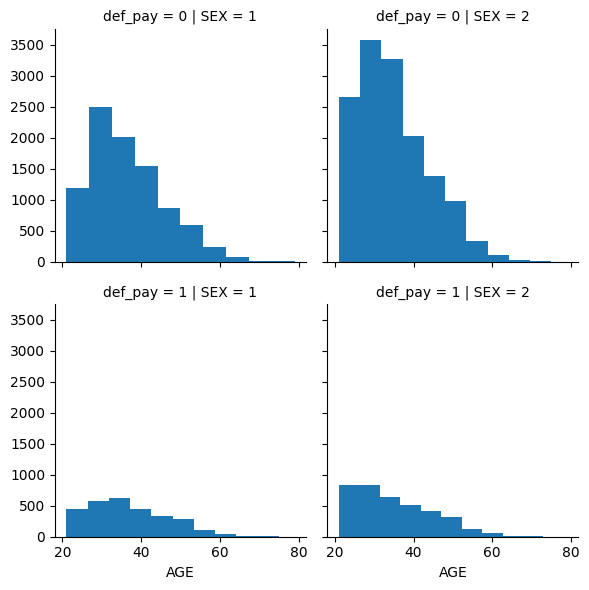

In [15]:
#utilizando la misma tecnica ahora tomamos el impago, con sexo de la persona y mostramos edad en el gráfico
g = sns.FacetGrid(impagos, row='def_pay', col='SEX')
g = g.map(plt.hist, 'AGE')

Se puede observar que en nuestro contexto operativo las mujeres de entre 20 y 30 años tienen una tendencia muy alta a no pagar en comparación con los hombres de todos los grupos de edad.

Por lo tanto, podemos la columna SEXO de los clientes si es determinante para predecir la probabilidad de impago.

* ahora comprobaremos si el importe del saldo por pagar de los últimos seis meses afectará el incumplimiento del pago del próximo mes o no:

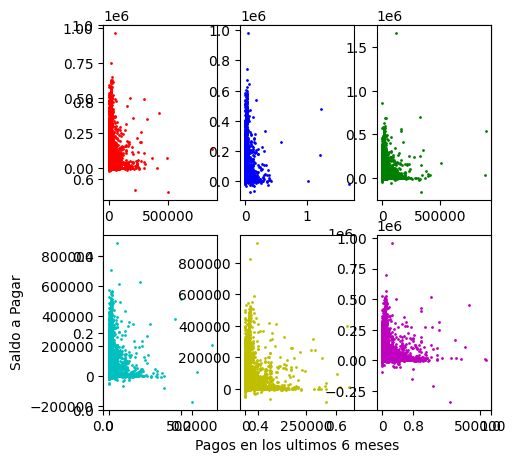

In [16]:
plt.subplots(figsize=(5,5))

plt.subplot(231)
plt.scatter(x=impagos.PAY_AMT1, y=impagos.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=impagos.PAY_AMT2, y=impagos.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=impagos.PAY_AMT3, y=impagos.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=impagos.PAY_AMT4, y=impagos.BILL_AMT4, c='c', s=1)
plt.ylabel("Saldo a Pagar", fontsize=10)

plt.subplot(235)
plt.scatter(x=impagos.PAY_AMT5, y=impagos.BILL_AMT5, c='y', s=1)
plt.xlabel("Pagos en los ultimos 6 meses", fontsize=10)

plt.subplot(236)
plt.scatter(x=impagos.PAY_AMT6, y=impagos.BILL_AMT6, c='m', s=1)

El gráfico anterior indica que hay una mayor proporción de clientes para quienes el monto del saldo a pagar es alto, pero los pagos realizados con cargo a la misma son muy bajos.
* Esto lo podemos inferir porque la cantidad máxima de puntos de datos está muy agrupada a lo largo del eje Y cerca de 0 en el eje X.

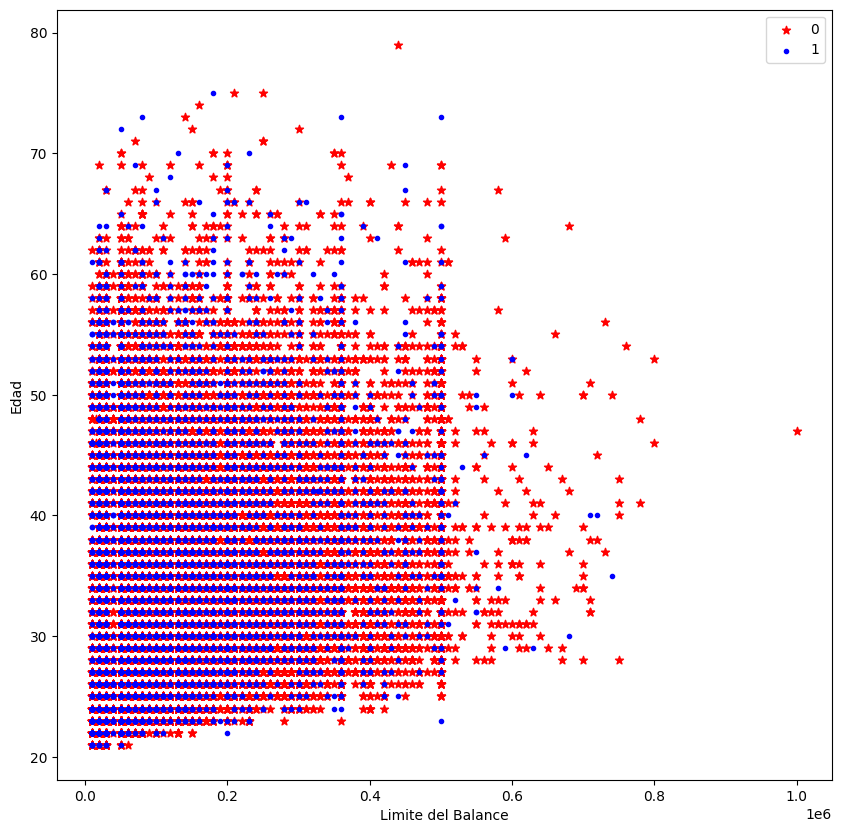

In [17]:
y1 = impagos.AGE[impagos["def_pay"] == 0]
y2 = impagos.AGE[impagos["def_pay"] == 1]
x1 = impagos.LIMIT_BAL[impagos["def_pay"] == 0]
x2 = impagos.LIMIT_BAL[impagos["def_pay"] == 1]

fig,ax = plt.subplots(figsize=(10,10))
plt.scatter(x1,y1, color="r", marker="*", label='0')
plt.scatter(x2,y2, color="b", marker=".", label='1')
plt.xlabel("Limite del Balance", fontsize=10)
plt.ylabel("Edad", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper right', fontsize=10)
plt.show()


El gráfico anterior de edad versus saldo límite no proporciona información precisa, ya que hay una variación mixta de clientes de todos los grupos de edad y su saldo límite del mes actual.

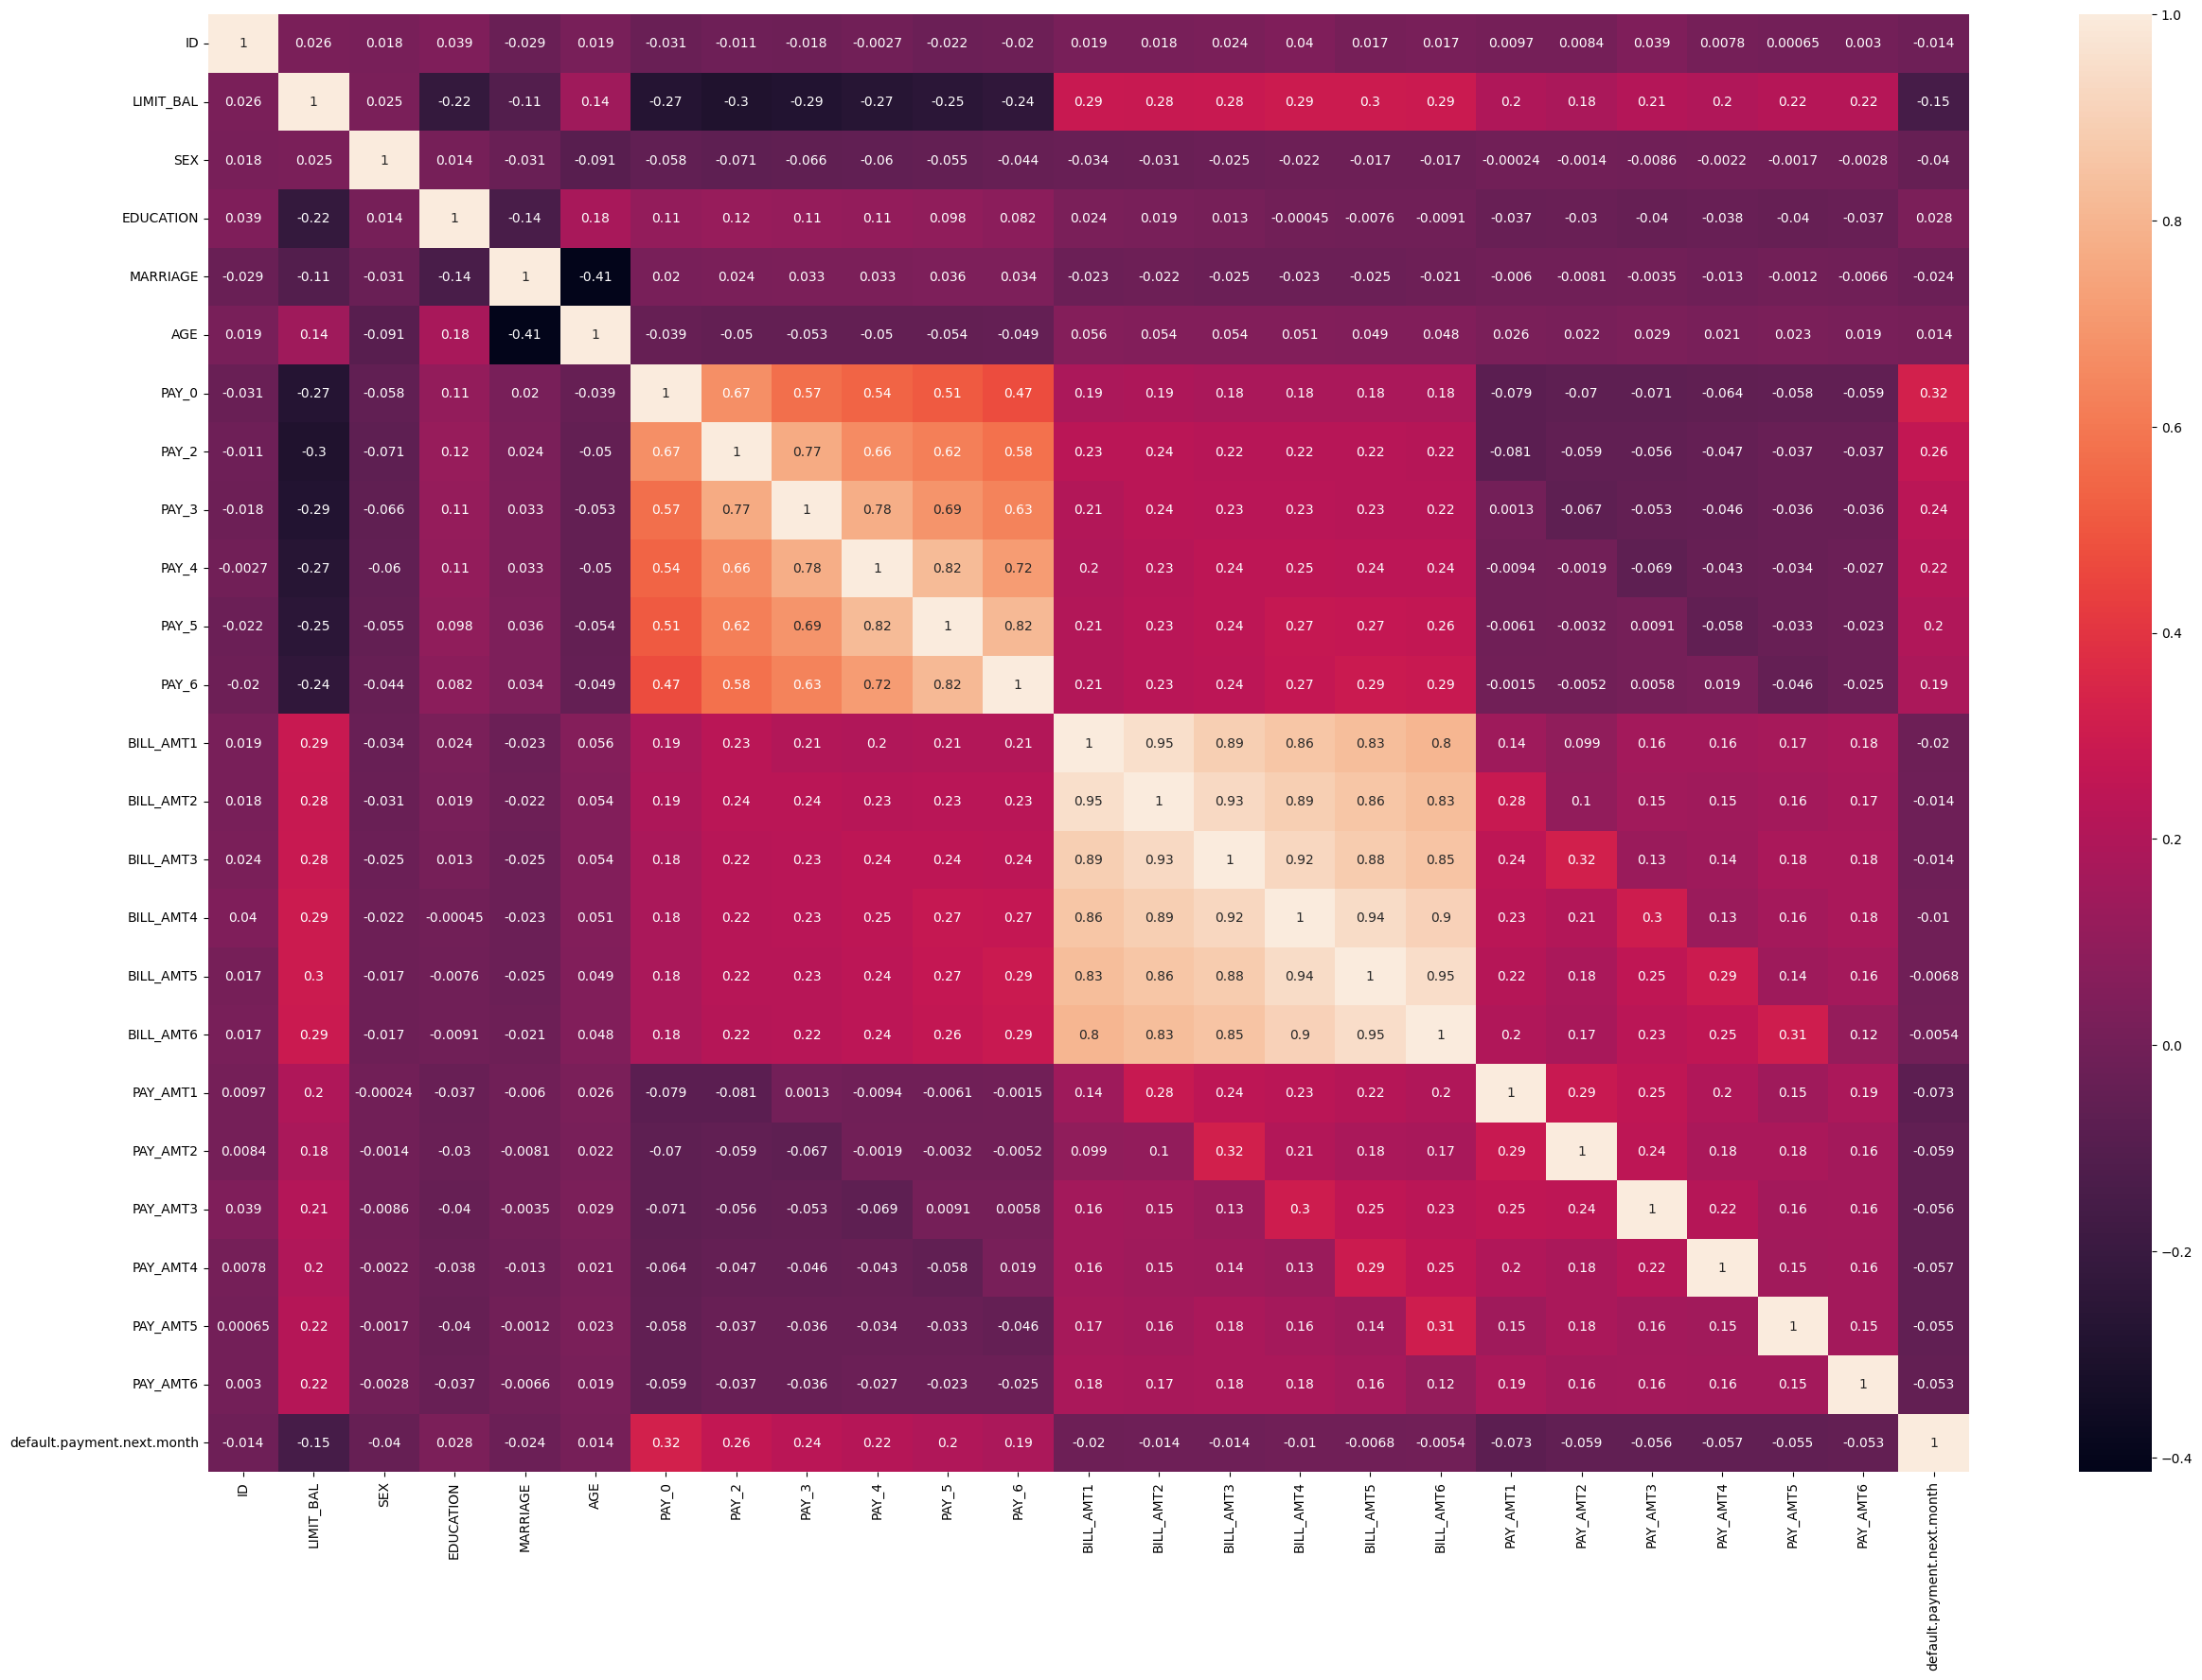

In [18]:
import seaborn as sns

plt.subplots(figsize=(30,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

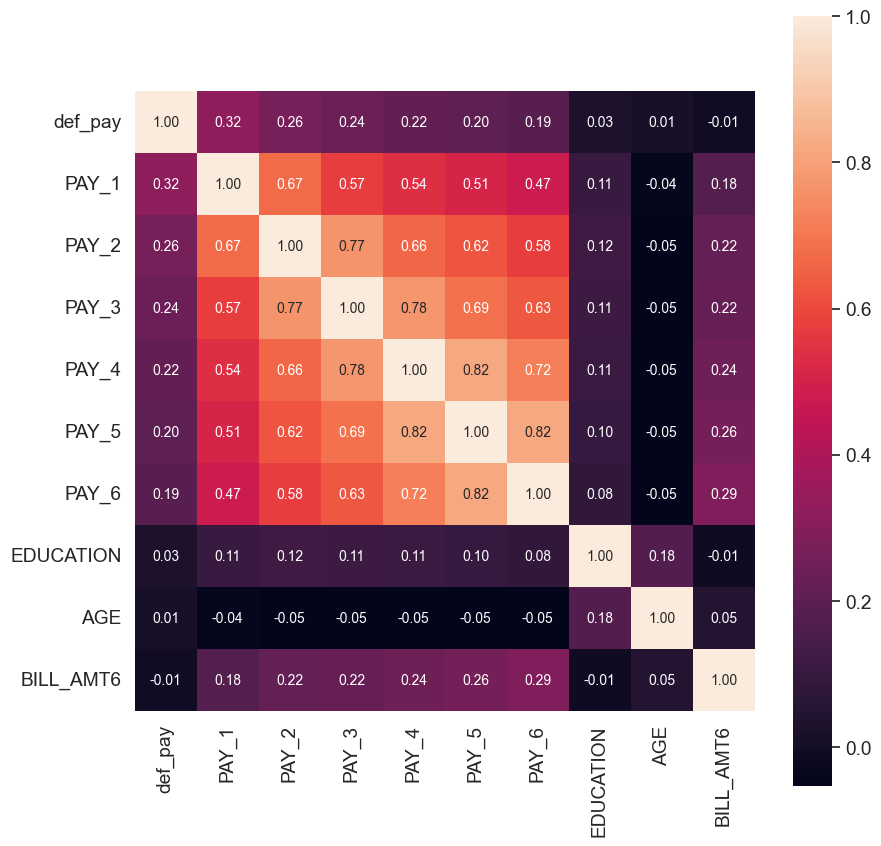

In [19]:
#renombrando columnas para facilidad de manejo
df.rename(columns={'default.payment.next.month':'def_pay'}, inplace=True) #renombrando columna
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True) #renombrando columna
#saleprice correlation matrix
k = 10 #numero de variables para el mapa de calor
corrmat = df.corr()
cols = corrmat.nlargest(k, 'def_pay')['def_pay'].index
cm = np.corrcoef(impagos[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Como podemos ver, la predicción del impago del mes próximo depende del estado de pago de los últimos seis meses de todas las características que se nos han proporcionado. Pero existe multicolinealidad entre las características del estado de pago.

Primero entrenaremos el modelo con todas las características e intentaremos reducir las características no importantes.

In [20]:
impagos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         30000 non-null  int64   
 1   LIMIT_BAL  30000 non-null  float64 
 2   SEX        30000 non-null  int64   
 3   EDUCATION  30000 non-null  int64   
 4   MARRIAGE   30000 non-null  int64   
 5   AGE        30000 non-null  int64   
 6   PAY_1      30000 non-null  int64   
 7   PAY_2      30000 non-null  int64   
 8   PAY_3      30000 non-null  int64   
 9   PAY_4      30000 non-null  int64   
 10  PAY_5      30000 non-null  int64   
 11  PAY_6      30000 non-null  int64   
 12  BILL_AMT1  30000 non-null  float64 
 13  BILL_AMT2  30000 non-null  float64 
 14  BILL_AMT3  30000 non-null  float64 
 15  BILL_AMT4  30000 non-null  float64 
 16  BILL_AMT5  30000 non-null  float64 
 17  BILL_AMT6  30000 non-null  float64 
 18  PAY_AMT1   30000 non-null  float64 
 19  PAY_AMT2   30000 non-null

In [ ]:
df_X = impagos.drop(['def_pay','AGE_BIN'], axis=1)
df_y = impagos.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model1 = LogisticRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nCalificación de Precisión para el modelo 1: ', accuracy_score(y_pred,y_test))

NameError: name 'impagos' is not defined

Podemos ver que se predice que todos los ejemplos serán negativos en cuanto al incumplimiento de pago el próximo mes con un 77,7 % de precisión, mientras que en el conjunto de datos tenemos 980 observaciones que se espera que no cumplan con el pago.
Después de realizar varios muestreos aleatorios cambiando el parámetro random_date, descubrimos que random_state=10 brinda la mayor precisión para nuestro modelo